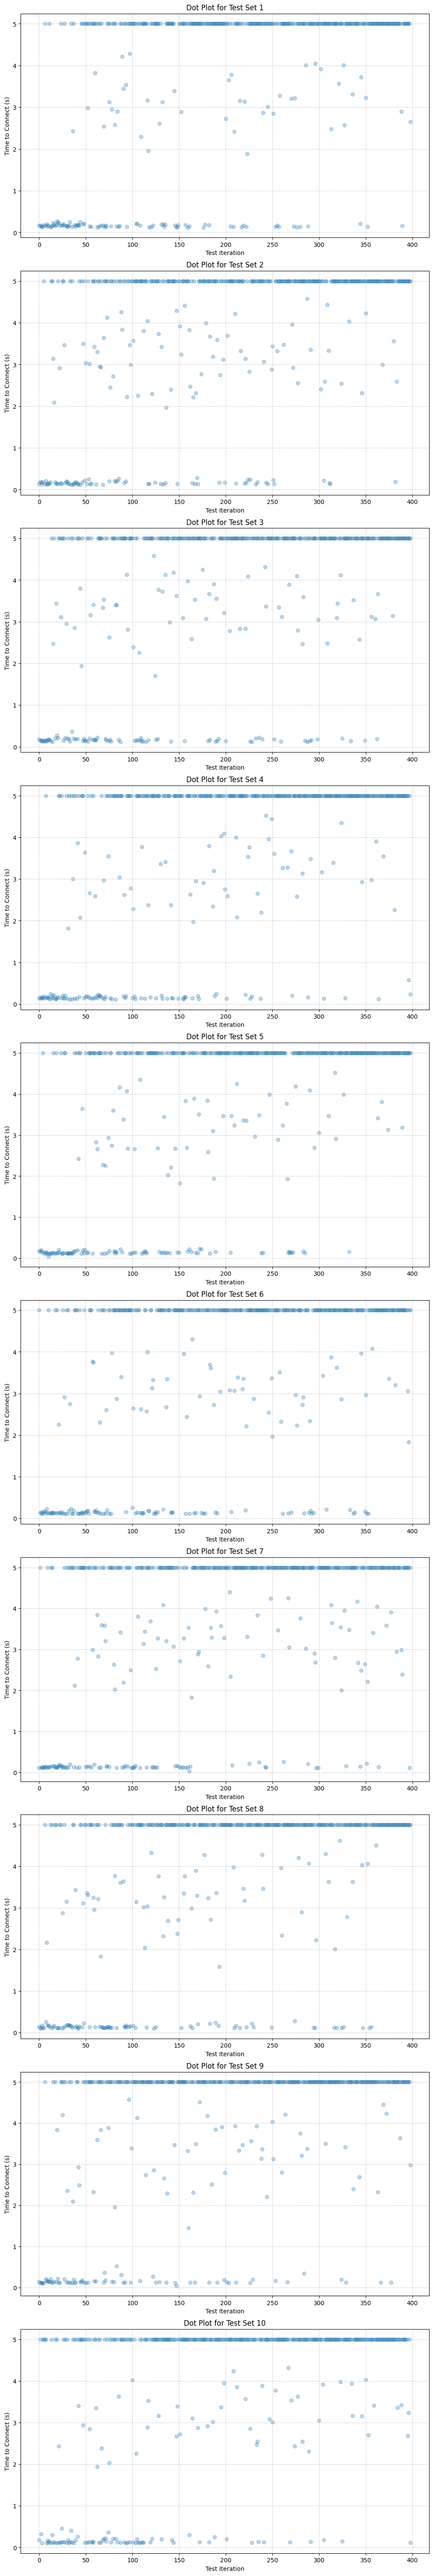

Facet plot saved to facet_plot.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_csv_faceted(file_list, output_file='facet_plot.png'):
    """
    Creates a faceted dot plot for multiple CSV files, where each plot
    corresponds to the 8th column of a CSV file as the y-axis and the row number as the x-axis.

    Parameters:
    - file_list (list): List of paths to the CSV files to plot.
    - output_file (str): Path to save the resulting plot image.
    """
    try:
        # Determine the layout for subplots (1 row per file)
        num_files = len(file_list)
        fig, axes = plt.subplots(nrows=num_files, ncols=1, figsize=(10, 6 * num_files), constrained_layout=True)

        # If there's only one file, axes is not a list, so wrap it in a list
        if num_files == 1:
            axes = [axes]

        # Loop through each file and create a plot
        for idx, csv_file in enumerate(file_list):
            # Load the CSV file
            data = pd.read_csv(csv_file)

            # Ensure there are enough columns
            if data.shape[1] < 8:
                raise ValueError(f"The CSV file '{csv_file}' must have at least 8 columns.")

            # Extract the 8th column for the y-axis
            y_values = data.iloc[:, 7].abs()  # 7 because pandas is zero-indexed

            # Create the dot plot for this file
            axes[idx].scatter(range(len(y_values)), y_values, alpha=0.3)
            axes[idx].set_title(f'Dot Plot for Test Set {idx+1}')
            axes[idx].set_xlabel('Test Iteration')
            axes[idx].set_ylabel('Time to Connect (s)')
            axes[idx].grid(True, linestyle='--', alpha=0.6)

        # Save the facet plot to a file
        plt.savefig(output_file)
        plt.show()
        print(f"Facet plot saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
file_list = ['./output.csv', './output2.csv', './output3.csv', './output4.csv', './output5.csv', './output6.csv', './output7.csv', './output8.csv', './output9.csv', './output10.csv']
plot_csv_faceted(file_list, 'facet_plot.png')

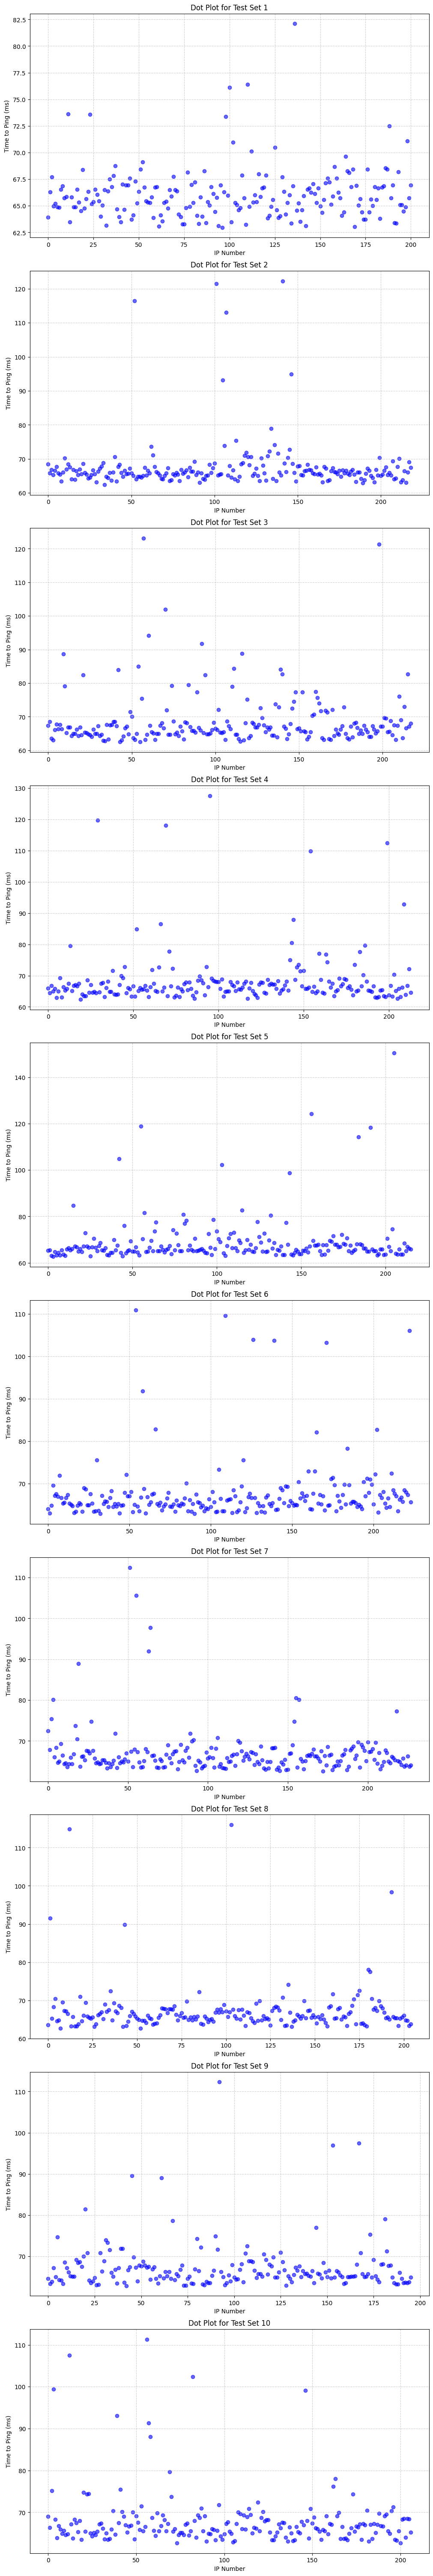

Facet plot saved to facet_last_column_plot.png


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_last_column_skip_no_ip_faceted(file_list, output_file='facet_last_column_plot.png'):
    """
    Creates a faceted dot plot for multiple CSV files, where each plot corresponds 
    to the last column of a CSV file as the y-axis and the row number (without gaps) as the x-axis,
    skipping rows where the last column's value is "NO IP TO PING".

    Parameters:
    - file_list (list): List of paths to the CSV files to plot.
    - output_file (str): Path to save the resulting plot image.
    """
    try:
        # Determine the layout for subplots (1 row per file)
        num_files = len(file_list)
        fig, axes = plt.subplots(nrows=num_files, ncols=1, figsize=(10, 6 * num_files), constrained_layout=True)

        # If there's only one file, axes is not a list, so wrap it in a list
        if num_files == 1:
            axes = [axes]

        # Loop through each file and create a plot
        for idx, csv_file in enumerate(file_list):
            # Load the CSV file
            data = pd.read_csv(csv_file)

            # Ensure there is at least one column
            if data.shape[1] < 1:
                raise ValueError(f"The CSV file '{csv_file}' must have at least one column.")

            # Extract the last column
            last_column = data.iloc[:, -1]

            # Filter out rows with "NO IP TO PING"
            valid_data = last_column[last_column != "NO IP TO PING"].reset_index(drop=True)

            # Ensure all values in the column are numeric
            valid_data = pd.to_numeric(valid_data, errors='coerce').dropna()

            # Create the dot plot for this file
            axes[idx].scatter(range(len(valid_data)), valid_data, color='blue', alpha=0.6)
            axes[idx].set_title(f'Dot Plot for Test Set {idx+1}')
            axes[idx].set_xlabel('IP Number')
            axes[idx].set_ylabel('Time to Ping (ms)')
            axes[idx].grid(True, linestyle='--', alpha=0.6)

        # Save the facet plot to a file
        plt.savefig(output_file)
        plt.show()
        print(f"Facet plot saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
file_list = ['./output.csv', './output2.csv', './output3.csv', './output4.csv', './output5.csv', './output6.csv', './output7.csv', './output8.csv', './output9.csv', './output10.csv']
plot_last_column_skip_no_ip_faceted(file_list, 'facet_last_column_plot.png')



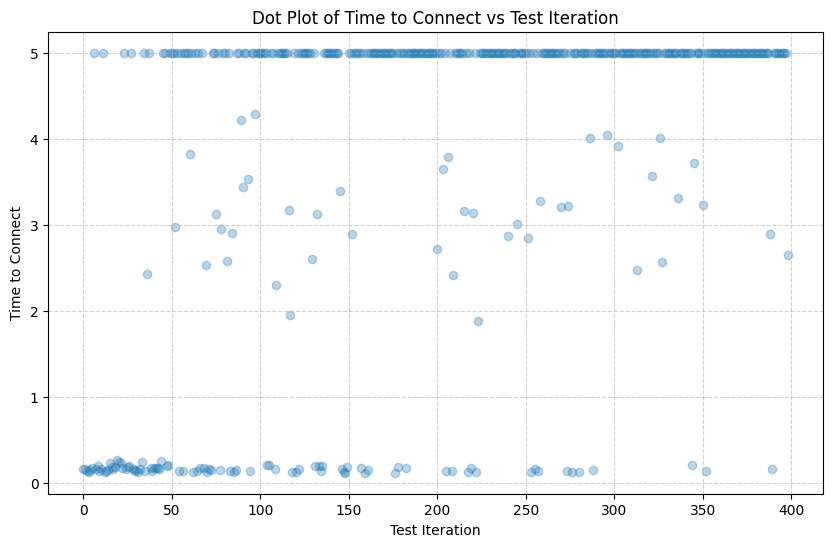

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_csv_dot(csv_file, output_file='plot.png'):
    """
    Plots a dot plot using the 8th column of a CSV file as the y-axis 
    and the row number as the x-axis.

    Parameters:
    - csv_file (str): Path to the CSV file to plot.
    - output_file (str): Path to save the resulting plot image.
    """
    try:
        # Load the CSV file
        data = pd.read_csv(csv_file)

        # Ensure there are enough columns
        if data.shape[1] < 8:
            raise ValueError("The CSV file must have at least 8 columns.")

        # Extract the 8th column for the y-axis
        y_values = data.iloc[:, 7].abs()  # 7 because pandas is zero-indexed

        # Create the dot plot
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(y_values)), y_values, alpha=0.3)
        plt.title('Dot Plot of Time to Connect vs Test Iteration')
        plt.xlabel('Test Iteration')
        plt.ylabel('Time to Connect')
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save the plot to a file
        plt.savefig(output_file)
        plt.show()
        # print(f"Plot saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
plot_csv_dot('./output.csv', 'dot_plot.png')

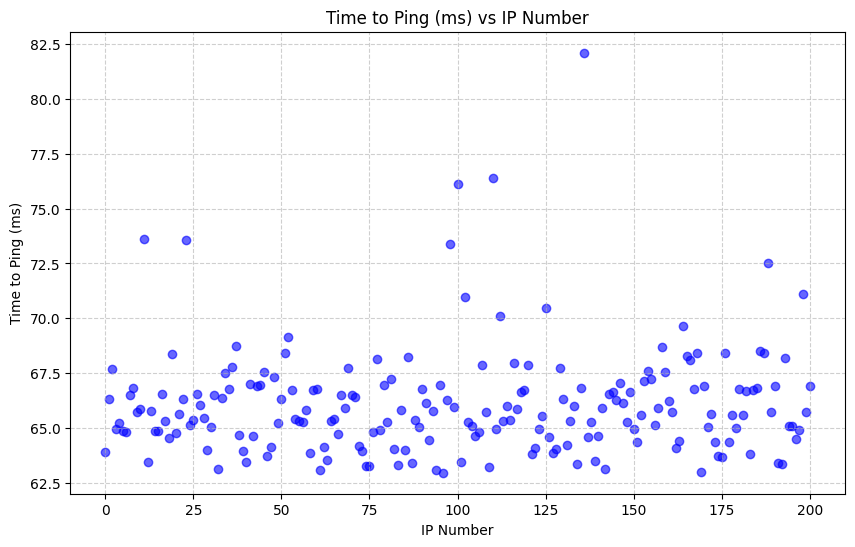

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_last_column_skip_no_ip(csv_file, output_file='plot_last_column.png'):
    """
    Plots a dot plot using the last column of a CSV file as the y-axis, 
    skipping rows where the last column's value is "NO IP TO PING". The x-axis 
    uses consecutive row numbers without gaps for valid rows.

    Parameters:
    - csv_file (str): Path to the CSV file to plot.
    - output_file (str): Path to save the resulting plot image.
    """
    try:
        # Load the CSV file
        data = pd.read_csv(csv_file)

        # Ensure there is at least one column
        if data.shape[1] < 1:
            raise ValueError("The CSV file must have at least one column.")

        # Extract the last column
        last_column = data.iloc[:, -1]

        # Filter out rows with "NO IP TO PING"
        valid_data = last_column[last_column != "NO IP TO PING"].reset_index(drop=True)

        # Ensure all values in the column are numeric
        valid_data = pd.to_numeric(valid_data, errors='coerce').dropna()

        # Create the dot plot
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(valid_data)), valid_data, color='blue', alpha=0.6)  # Reduced opacity for dots
        plt.title('Time to Ping (ms) vs IP Number')
        plt.xlabel('IP Number')
        plt.ylabel('Time to Ping (ms)')
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save the plot to a file
        #plt.savefig(output_file)
        plt.show()
        #print(f"Plot saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
plot_last_column_skip_no_ip('output.csv', 'dot_plot_last_column.png')

